<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [77]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [83]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.sort_values(by='duration', ascending=True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


In [7]:
movies['duration'].min()

64

In [8]:
movies['duration'].max()

242

#### Create a histogram of duration, choosing an "appropriate" number of bins.

<AxesSubplot:>

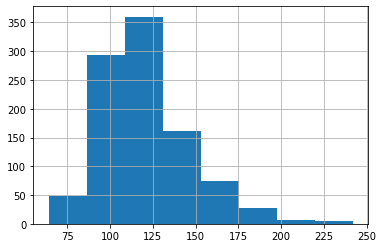

In [9]:
movies['duration'].hist(bins=8)

#### Use a box plot to display that same data.

<AxesSubplot:>

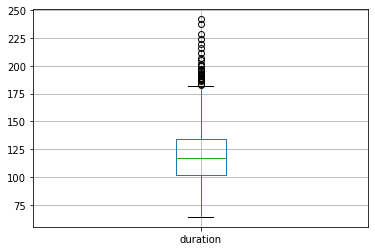

In [10]:
movies.boxplot(column=['duration'])

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
ratings = movies.value_counts(movies['content_rating'])
ratings = pd.DataFrame(ratings)
ratings

,0
content_rating,
R,460
PG-13,189
PG,123
NOT RATED,65
APPROVED,47
UNRATED,38
G,32
NC-17,7
PASSED,7


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, '# of movies w/ rating')

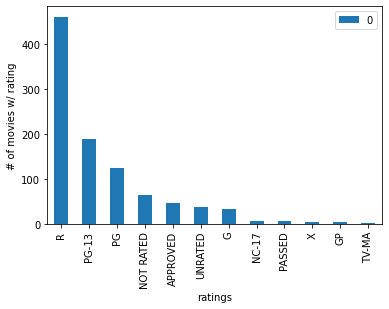

In [23]:
ratings.plot.bar()
plt.xlabel("ratings")
plt.ylabel("# of movies w/ rating")

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [ ]:
type()

In [86]:
adjustment_string = 'UNRATED'
strings_to_adjust = ['NOT RATED', 'APPROVED', 'PASSED']
Adjusted_col =[]

for x in movies['content_rating']:
    if x in strings_to_adjust:
        Adjusted_col.append(adjustment_string)
    
    else:
        Adjusted_col.append(x)

movies['content_rating'] = Adjusted_col

R          460
PG-13      189
UNRATED    157
PG         123
G           32
NC-17       12
GP           3
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [87]:
adjustment_string = 'NC-17'
strings_to_adjust = ['X', 'TV-MA']
Adjusted_col =[]

for x in movies['content_rating']:
    if x in strings_to_adjust:
        Adjusted_col.append(adjustment_string)
    
    else:
        Adjusted_col.append(x)

movies['content_rating'] = Adjusted_col
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    157
PG         123
G           32
NC-17       12
GP           3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [56]:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [57]:
movies['content_rating'].fillna('UNRATED', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [64]:
movies_2 = movies[movies['duration'] < 120]
movies_2['star_rating'].mean()

7.838666666666657

In [65]:
movies_2a = movies[movies['duration'] > 120]
movies_2a['star_rating'].mean()

7.953669724770622

#### Use a visualization to detect whether there is a relationship between duration and star rating.

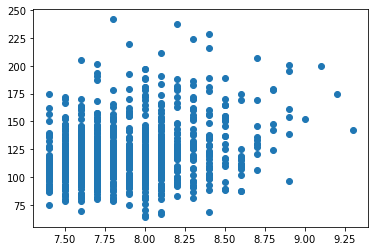

In [104]:
x = movies['star_rating']
y = movies['duration']

plt.scatter(x, y)
plt.show()

#### Calculate the average duration for each genre.

In [97]:
movies['genre'].value_counts(movies['duration'].mean)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

TypeError: 'value' must be an instance of str or bytes, not a float

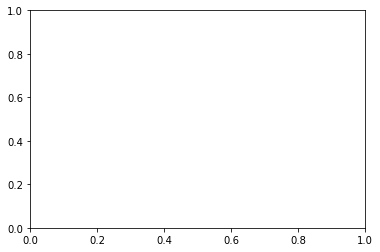

In [105]:
x = movies['content_rating']
y = movies['duration']

plt.scatter(x, y)
plt.show()

#### Determine the top rated movie (by star rating) for each genre.

In [ ]:
# Answer:

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [ ]:
# Answer:

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!